# Klassifikation

In einer Umfrage wurde $n=?$ Studierende gefragt:

- $y$: Gefällt Ihnen die originale Star-Wars Trilogie (ja/nein)
- $x_1$: Wie sehr interessieren Sie sich für Science-Fiction im Allgemeinen (gar nicht = 0, 1, 2, 3, 4, 5 =sehr)
- $x_2$: Interessiert Sie der Bechdel-Test (ja/nein/egal)

(Ein Film besteht den Bechdel-Test, wenn es mindestens 2 weibliche Rollen gibt, die miteinander über etwas anderes als Männer reden.)

Die Daten der Umfragen liegen netterweise bereits als npz-Dateien im OPAL.

## Aufgabe 1: Visualiserung

- Visualisieren
- Wie viele Studierende haben teilgenommen?
- Sind die Daten eindeutig separierbar?

In [1]:
import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt

data = np.load('assets/s07_data.npz')
print(data)

NpzFile 'assets/s07_data.npz' with keys: x, y


In [2]:
x = data['x']
y = data['y']

In [3]:
print(x.shape)
n = x.shape[0]
print(f'Es haben {n} Studierende teilgenommen')

(35, 2)
Es haben 35 Studierende teilgenommen


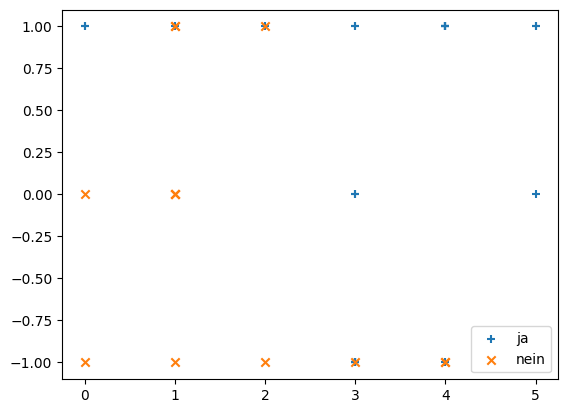

In [4]:
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='+', label='ja')
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='x', label='nein')
plt.legend()
plt.show()

weniger als 35 Punkte sichtbar<br>
$\Rightarrow$ manche liegen übereinander<br>
$\Rightarrow$ einige Position haben beide Labels

## Aufgabe 2: Klassifikation

Wir wollen nun Klassifikationsmodelle implementieren

$$y\approx g(\mathbf{x})=g(p(x_1,x_2))$$
$$p(x_1,x_2)=b+w_1x_1+w_2x_2$$

Auswertung mittels Konfusionsmatrix.

In [5]:
def confusion_mat(true, pred):
    TP = (true==pred)[true==1].sum()
    TN = (true==pred)[true==0].sum()
    FP = (true!=pred)[true==0].sum()
    FN = (true!=pred)[true==1].sum()
    
    cm = np.array([[TP, FN], [FP, TN]])
    
    acc = (TP + TN) / len(true)
    prec = (TP) / (TP + FP)
    rec = (TP) / (TP + FN)
    F1 = 2 * prec * rec / (prec + rec)
    metrics = {'acc': acc, 'prec': prec, 'rec': rec, 'F1': F1}
    
    return cm, metrics

In [6]:
X = np.hstack([np.ones((n,1)), x])

W = np.linalg.lstsq(X, y, rcond=None)[0]
print('W =', W)

W = [0.2116 0.1548 0.1645]


In [7]:
def predict(X, w):
    pred = X @ w
    y_hat = np.zeros((X.shape[0],))
    y_hat[pred >= 0.5] = 1
    return y_hat

In [8]:
y_pred = predict(X, W)
cm, metrics = confusion_mat(y, y_pred)

print(cm)
print(metrics)

[[20  2]
 [ 6  7]]
{'acc': 0.7714285714285715, 'prec': 0.7692307692307693, 'rec': 0.9090909090909091, 'F1': 0.8333333333333333}


### Logistische Regression

logistische Regression mit Sigmoid $\phi(z)$, durch Gradienten Verfahren trainiert

$$g=\begin{cases}1:&\phi(p(\mathbf{x}))\geq 0.5\\0:&\phi(p(\mathbf{x}))<0.5\end{cases}$$

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    z = X @ w
    z = sigmoid(z)
    return np.round(z, 0)

def gradient(w, X, y):
    z = X @ w
    p = sigmoid(z)
    # mit Mittelung durch n
    return X.T @ (p - y) / X.shape[0]

def gd(w0, X, y, grad, alpha, max_it):
    wk = w0
    grads = np.zeros(max_it)
    for k in range(max_it):
        g = grad(wk, X, y)
        grads[k] = np.linalg.norm(g)
        wk = wk - alpha * g
    return wk, grads

In [10]:
w0 = np.zeros(3)

w, grads = gd(w0, X, y,
              grad=gradient,
              alpha=1e-1,
              max_it=3_000)

pred_log = predict(X, w)

cm_log, metrics_log = confusion_mat(y, pred_log)
print(cm_log)
print(metrics_log)

[[20  2]
 [ 6  7]]
{'acc': 0.7714285714285715, 'prec': 0.7692307692307693, 'rec': 0.9090909090909091, 'F1': 0.8333333333333333}


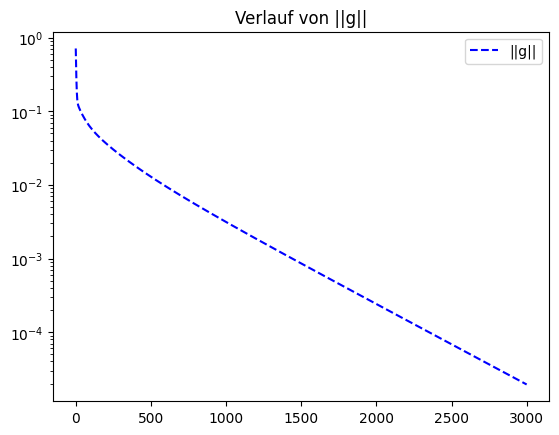

In [11]:
plt.semilogy(grads, 'b--', label='||g||')
plt.title('Verlauf von ||g||')
plt.legend()
plt.show()

### Support Vektor Maschine

In [12]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=50.0)
model.fit(X, y)

pred_svm = model.predict(X)

In [13]:
cm_svc, metrics_svc = confusion_mat(y, pred_svm)
print(cm_svc)
print(metrics_svc)

[[19  3]
 [ 1 12]]
{'acc': 0.8857142857142857, 'prec': 0.95, 'rec': 0.8636363636363636, 'F1': 0.9047619047619048}
